In [2]:
# Page segmentation modes:
#   0    Orientation and script detection (OSD) only.
#   1    Automatic page segmentation with OSD.
#   2    Automatic page segmentation, but no OSD, or OCR.
#   3    Fully automatic page segmentation, but no OSD. (Default)
#   4    Assume a single column of text of variable sizes.
#   5    Assume a single uniform block of vertically aligned text.
#   6    Assume a single uniform block of text.
#   7    Treat the image as a single text line.
#   8    Treat the image as a single word.
#   9    Treat the image as a single word in a circle.
#  10    Treat the image as a single character.
#  11    Sparse text. Find as much text as possible in no particular order.
#  12    Sparse text with OSD.
#  13    Raw line. Treat the image as a single text line,
#        bypassing hacks that are Tesseract-specific.
# OCR Engine modes: (see https://github.com/tesseract-ocr/tesseract/wiki#linux)
#   0    Legacy engine only.
#   1    Neural nets LSTM engine only.
#   2    Legacy + LSTM engines.
#   3    Default, based on what is available.

In [3]:
import cv2
import re
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
img = cv2.imread('invoice.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT, config='--psm 6')
# d = pytesseract.image_to_data(img, output_type=Output.DICT)
# print(d.keys())
# d['text']

In [18]:
img.shape

(1202, 850, 3)

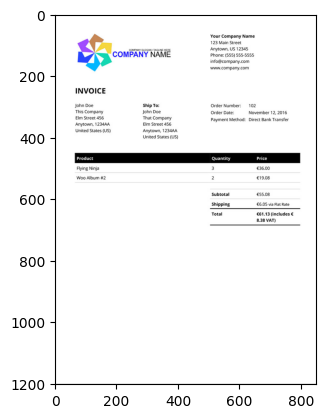

In [53]:
plt.imshow(img)
plt.show()

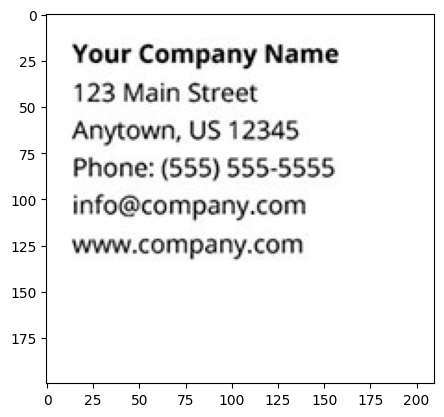

Your Company Name
123 Main Street
Anytown, US 12345,
Phone: (555) 555-5555
info@company.com
www.company.com



In [57]:
test = img[50:250,490:700]
plt.imshow(test)
plt.show()

text = pytesseract.image_to_string(test)
print(text)

# t = pytesseract.image_to_data(test, output_type=Output.DICT, config='--psm 6')
# t['text']

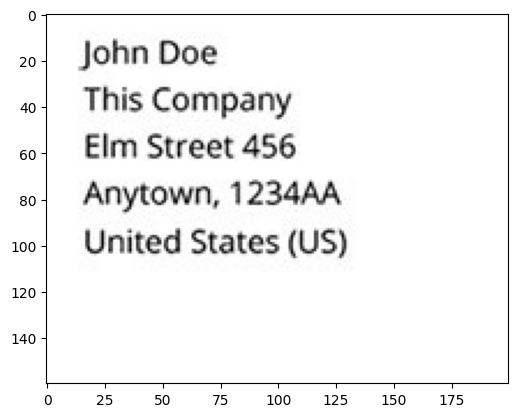

John Doe

This Company
Elm Street 456
Anytown, 1234AA
United States (US)



In [56]:
test = img[280:440, 50:250]
plt.imshow(test)
plt.show()

text = pytesseract.image_to_string(test)
print(text)

# t = pytesseract.image_to_data(test, output_type=Output.DICT, config='--psm 6')
# t['text']

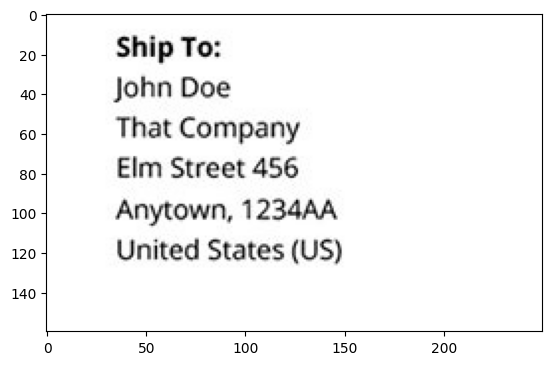

Ship To:

John Doe

That Company
Elm Street 456
Anytown, 1234AA
United States (US)



In [58]:
test = img[280:440, 250:500]
plt.imshow(test)
plt.show()

text = pytesseract.image_to_string(test)
print(text)

# t = pytesseract.image_to_data(test, output_type=Output.DICT, config='--psm 6')
# t['text']

In [5]:
# d['text']

In [6]:
n_boxes = len(d['text'])

for i in range(n_boxes):

    if d['text'][i] == 'Order' and d['text'][i+1] == 'Number:':
        order_num = int(d['text'][i+2])

    if d['text'][i] == 'Order' and d['text'][i+1] == 'Date:':
        order_date = d['text'][i+2] + ' ' + d['text'][i+3] + ' ' + d['text'][i+4]
        order_date = datetime.strptime(order_date, "%B %d, %Y")

    if d['text'][i] == 'Payment' and d['text'][i+1] == 'Method:':
        payment_method = d['text'][i+2]
        for x in range(3, n_boxes-i):
            if d['text'][i+x] != '':
                payment_method = payment_method + ' ' + d['text'][i+x]
            else:
                break
            
    if d['text'][i] == 'VAT' or d['text'][i] == 'VAT)':
        vat = d['text'][i-1]
        if '€' not in vat:
            vat = '€'+vat

In [7]:
subtotal_idx = d['text'].index('Subtotal')
shipping_idx = d['text'].index('Shipping')
total_idx = d['text'].index('Total')
vat_idx = d['text'].index('VAT)')

subtotal = d['text'][subtotal_idx+1]
shipping = d['text'][shipping_idx+1]
total = d['text'][total_idx+1]

In [8]:
print(f'Order Number: {order_num}')
print(f'Order Date: {order_date}')
print(f'Payment Method: {payment_method}')
print(f'Subtotal: {subtotal}')
print(f'Shipping: {shipping}')
print(f'VAT: {vat}')
print(f'Total: {total}')

Order Number: 102
Order Date: 2016-11-12 00:00:00
Payment Method: Direct Bank Transfer
Subtotal: €55.08
Shipping: €6.05
VAT: €8.38
Total: €61.13


In [9]:
img.shape

(1202, 850, 3)

In [10]:
# from img2table.document import Image
# from img2table.ocr import TesseractOCR

# ocr = TesseractOCR(lang="eng")

# # Instantiation of the image
# img = Image(src="invoice.png")

# # Table identification
# img_tables = img.extract_tables(borderless_tables=True)

# # Result of table identification
# img_tables[0].df

In [11]:
# invoice = {'Order_number': order_num,
#            'Order_date': order_date}
# print(invoice)

In [12]:
# image = cv2.imread('invoice.png')
# thresh = 255 - cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # x,y,w,h = 37, 625, 309, 28  
# # ROI = thresh[y:y+h,x:x+w]
# # data = pytesseract.image_to_string(ROI, lang='eng',config='--psm 6')
# # print(data)

In [13]:
# x,y,w,h = 1, 5, 10, 20  
# ROI = img[y:y+h,x:x+w]
# test = pytesseract.image_to_string(ROI, lang='eng',config='--psm 6')

In [14]:
# img[5:5000,10:1000]

In [15]:
# plt.imshow(img[0:1300,10:1000])

In [16]:
# n_boxes = len(d['text'])
# for i in range(n_boxes):
#     if int(d['conf'][i]) > 50:
#         (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#         img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# cv2.imshow('img', img)
# cv2.waitKey(0)